# Homework 7
PSY4219/6129 Fall 2022

**Due November 2**

**18 points**

As with all homework assignments, we expect you to use comments, use docstrings 
for functions, use meaningful variable and function names, use vectorized 
operations when possible, create functions to modularize your code, make sure 
figures are labeled thoroughly and formatted appropriately, use the Pythonic 
(object-oriented) rather than Matlab (stateful) approach to creating figures 
and axes, and follow the other guidelines and best practices discussed in 
class. You can complete this homework assignment in a Jupyter notebook or a 
Python .py file.

*Unexcused late assignments will be penalized 10% for every 24 hours late, 
starting from the time class ends, for a maximum of two days, after which they 
will earn a 0.*

In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import numpy.random as R
import math
from matplotlib.ticker import FormatStrFormatter

***
## Q1
This question will ask you to implement in Python some of the random number 
generation methods we discussed in class. In class, we talked about random 
number generators for uniform distributions, normal distributions, and 
exponential distributions. We also talked about creating random number 
generators for arbitrary distributions. The triangular distribution is just one
possible distribution out there in the universe of possible probability 
distributions. 

![triangular distribution](https://i.imgur.com/Sc76gYs.png)

`left` defines the lower limit, `right` defines the upper limit, and `mode` 
defines the peak of the distribution. Like every probability distribution, the 
area under the distribution is 1.0.

Use the following parameters for this assignment, but make sure your code works 
for any values of these parameters; your code must be organized so that I only 
need to change `left`, `mode`, and `right` in one place in your code:

In [2]:
left = 1
mode = 2
right = 5

Your code will be tested by trying different values of `left`, `mode`, and 
`right`.
### Q1 (a) (2 point)
Plot the triangular distribution (its probability density function, pdf, as 
illustrated above). The plot should be done within a function. Please use the 
Pythonic (object-oriented) rather than Matlab (stateful) approach to creating 
figures and axes. Again, remember that your code must work for any values of 
`left`, `mode`, and `right`.

To create this plot, you will need to write a function that returns the value 
of the pdf given a particular value (this function will also be useful in the 
parts c and d). You can try to figure out the equations for the pdf from the 
geometry on your own so that the area under the probability density function 
(pdf) is equal to 1, or you can simply find the equations for the probability 
density function (pdf) for a triangular distribution online (Wikipedia or 
elsewhere); note that there is a built-in pdf function in scipy in Python for 
the triangular distribution, but it assumes `left = 0` and `right = 1`.

In [3]:
def triang_pdf(
    x: npt.ArrayLike, 
    left: float = 1., 
    mode: float = 2., 
    right: float = 5.
) -> np.ndarray:
    """
    This function generates the pdf of a triangular distribution with the above given parameters.
    """
    y = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] < left:
            y[i] = 0 
        elif left <= x[i] < mode:
            y[i] = 2 * (x[i] - left) / ((right - left) * (mode - left))
        elif x[i] == mode:
            y[i] = 2 / (right - left)
        elif mode < x[i] <= right:
            y[i] = 2 * (right - x[i]) / ((right - left) * (right - mode))
        else:
            y[i] = 0
    return y

def plot_pdf(
    ax: plt.Axes,
    x: npt.ArrayLike,
    y: npt.ArrayLike,
    title: str,
    xLabel: str,
    yLabel: str
) -> None:
    """
    This function plot the pdf of a triangular distribution with the above given parameters.
    """
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)

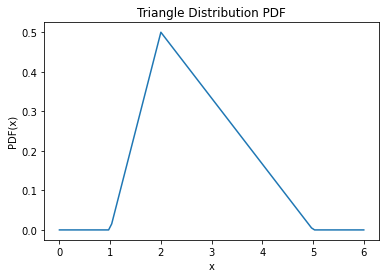

In [4]:
# Evaluate the PDF on a range of x values
left = 1
mode = 2
right = 5
x = np.linspace(left-1, right+1, 100)
y = triang_pdf(x, left, mode, right)

# Plot the PDF
fig, ax = plt.subplots()
plot_pdf(ax, x, y, "Triangle Distribution PDF", "x", "PDF(x)")
plt.show()

### Q1 (b) (1 point)
Look within the numpy documentation to find the built-in random number 
generator for the triangular distribution. Generate 1000 random samples from 
the triangular distribution. Create a histogram from these samples following 
the examples shared in class; creating the histogram should be done by a 
function that can be used in parts c and d below. The histogram should look a 
little like the plot of the probability distribution you created for part 1 
(you might confirm that for yourself by running it with 10x or 100x the number 
samples, but I only want to run your code for 1000 when we test your code).

In [10]:
def plot_hist(ax: plt.Axes, val: npt.ArrayLike, title: str) -> None:
    """
    This function plot the histogram of the distribution of samples drawn from a triangular distribution.
    """
    nbins = 30
    x_min = left - 1
    x_max = right + 1
    (h, hb) = np.histogram(val, bins = nbins, range=(x_min, x_max), density=True)
    ax.bar(hb[:len(hb)-1], h, width=(x_max - x_min) / nbins, align='edge')
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')
    ax.set_title(title)

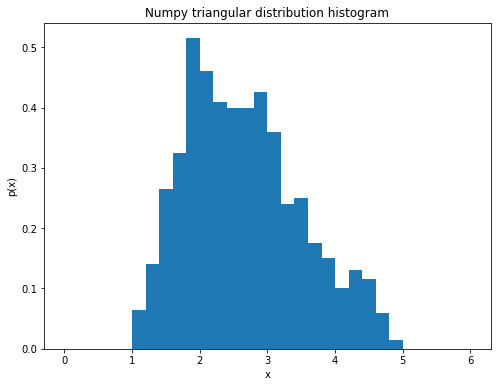

In [11]:
# TODO: Genereate 1000 random numbers from the triangle distribution
r = np.random.triangular(1, 2, 5, 1000)

# TODO: Plot the histogram of the random numbers
fig, ax = plt.subplots(figsize=(8, 6))
plot_hist(ax, r, 'Numpy triangular distribution histogram')
plt.show()

### Q1 (c) (5 points)
Now create your own random number generator for the triangular distribution 
using the rejection sampling method we discussed in class. Generate 1000 random 
samples, create a histogram, and a plot, just as you did for part b. Again, 
make sure your code works for any valid values of `left`, `mode`, and `right`. This 
should be implemented as a function modeled after the built-in numpy prng used 
in (b), with arguments defining the shape of the triangular distribution and 
the number of random numbers to generate, returning an array of random samples 
as a numpy array.

In [71]:
def triang_px(x, left, mode, right):
    """
    This function return p(x) of a given x value in a triangle distribution
    """
    if left <= x <= mode:
        px = 2 * (x - left) / ((right - left) * (mode - left))
    elif mode < x <= right:
        px = 2 * (right - x) / ((right - left) * (right - mode))
    else:
        px = 0
    return px

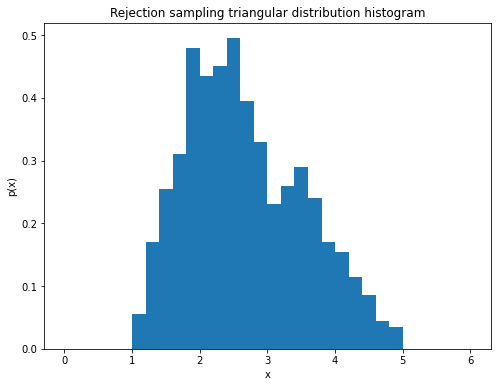

In [72]:
def triang_reject_sampling(
    left: float, 
    mode: float, 
    right: float, 
    size: int = None
) -> np.ndarray:
    """
    This function is a random number generator for a triangular distribution using the rejection sampling
    method given the above parameters.
    """
    x = R.uniform(left, right, size)
    g = R.uniform(0, 2 / (right - left), size)
    
    for i in range(size):
        px = triang_px(x[i], left, mode, right)
            
        while g[i] > px:
            x[i] = R.uniform(left, right)
            g[i] = R.uniform(0, 2 / (right - left))
            px = triang_px(x[i], left, mode, right)
        
    return x
        
# Generate 1000 random numbers from the triangle distribution
left = 1
mode = 2
right = 5

r = triang_reject_sampling(left, mode, right, 1000)

# Plot the histogram
fig, ax = plt.subplots(figsize=(8, 6))
plot_hist(ax, r, 'Rejection sampling triangular distribution histogram')
plt.show()

### Q1 (d) (5 points)
Now create your own random number generator for the triangular distribution 
using the Metropolis (MCMC) algorithm we discussed in class. Generate 1000 
random samples, create a histogram, and a plot, just as you did for parts b and 
c. Again, make sure your code works for any valid values of `left`, `mode`, and 
`right`. This should be implemented as a function modeled after the built-in 
numpy prng used in (b), with arguments defining the shape of the triangular 
distribution and the number of random numbers to generate, returning an array 
of random samples as a numpy array; it will need to include optional arguments 
specifying the burn-in and thinning (described below).

I outlined the Metropolis algorithm in class. I will formalize it here so as to 
roughly follow the text that is on the Wikipedia page for Metropolis-Hastings 
(a generalization of the Metropolis algorithm).

Metropolis algorithm (symmetric proposal distribution)

Let $p(x)$ be the desired probability distribution, which in this case is the 
triangular distribution (note that the Wikipedia page formalizes using $f(x)$, 
a function proportional to $p(x)$, which is the approach used, for example, to 
generate random numbers for a Bayesian posterior distribution).

 
1. Initialization: 
* Choose an arbitrary point $x_0$ to be the first sample. The first point in the 
    chain $x_t$ will be equal to $x_0$. Since you know the shape of the 
    triangular distribution, it makes sense to pick a first sample $x_0$ that is 
    within the range of the distribution.
* Choose a proposal distribution $g(x_p|x_t)$, where $x_t$ is the current point in 
    the chain and $x_p$ is the proposed point in the chain. For the Metropolis 
    algorithm, the proposal distribution needs to be symmetric (Metropolis-
    Hastings generalizes to allow for non-symmetric proposal distributions). 
    The simplest choice for $g(x_p|x_t)$ is to assume that $x_p$ is drawn from a 
    normal distribution with mean $x_t$ and standard deviation $\sigma$; 
    $\sigma$ should be small, but not too small. 

2. For each iteration:
* Generate: Generate a candidate $x_p$ from $g(x_p|x_t)$ using the above.
* Calculate: Calculate the acceptance ratio $A = p(x_p)/p(x_t)$, which is used to 
    decide whether to accept or reject the proposed candidate.
* Accept or Reject:
    * Generate a uniform random number $U$ on $[0,1)$.
    * If $U <= A$ accept the proposed candidate by setting $x_t = x_p$.
    * If $U > A$ reject the proposed candidate.

Each new $x_t$ produced on each iteration is a candidate random number produced 
by the Metropolis algorithm. 

Use a burn-in of 100 samples. That means that you throw away the first 100 
iterations of the Metropolis algorithm.

Use the Metropolis algorithm to generate 1000 random samples from the 
triangular distribution. Because the Metropolis algorithm produces highly 
correlated samples (it is a random walk) I want you to thin, as discussed in 
class, such that you keep only 1 of every 50 $x_t$ values produced by the 
Metropolis algorithm (you throw away 49 of every 50 sample). Your value of 
thinning should be a variable that can be adjusted in your code.

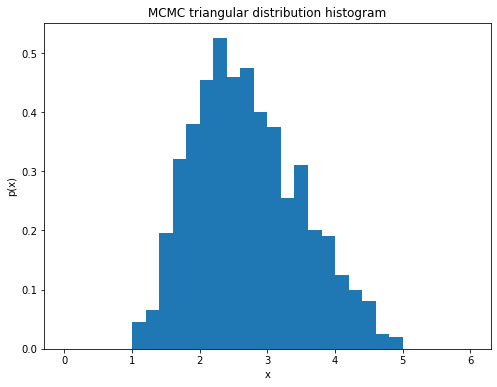

In [79]:
def triang_mcmc(
    left: float, 
    mode: float, 
    right: float, 
    size: int = None,
    burnin: int = 0, 
    thin: int = 1
) -> np.ndarray:
    """
    This function uses the Metropolis(MCMC) algorithm to generate a triangle distribution taken in the
    above parameters.
    """
    x = np.zeros(size + burnin)
    x0 = R.uniform(left, right)
    xt = x0
    
    i = 0
    j = 0
    sigma = 0.5
    
    while i < size + burnin:
        xp = R.normal(xt, sigma)
        A = triang_px(xp, left, mode, right) / triang_px(xt, left, mode, right)
        U = R.uniform(0,1)
        if U <= A:
            xt = xp
            if j % thin == 0:
                x[i] = xt
                i += 1
            j += 1
        else:
            continue
     
    x = x[burnin:]
    return x

# Generate 1000 random numbers from the triangle distribution
r = triang_mcmc(left, mode, right, 1000, burnin=100, thin=50)

# Plot the histogram
fig, ax = plt.subplots(figsize=(8, 6))
plot_hist(ax, r, 'MCMC triangular distribution histogram')
plt.show()

## Q2 (5 points)
Create a figure that is an array of plots using `matplotlib` to illustrate how
changing values of the parameters $\alpha_1$, $\beta_1$, and $w$ (holding 
$\alpha_2$ and $\beta_2$ fixed) changes the shape of the Hemodynamic Response 
(HDR) function you used in past homework assignments. 

$$
HDR(t) = w\left(\frac{\beta_{1}^{\alpha_{1}}t^{\alpha_{1}}e^{-t\beta_{1}}}{\Gamma(\alpha_{1})}\right) - 
(1 - w)\left(\frac{\beta_{2}^{\alpha_{2}}t^{\alpha_{2}}e^{-t\beta_{2}}}{\Gamma(\alpha_{2})}\right)
$$

Obviously, you will need to create a Python function that computes the HDR 
function. For the default (original) values for the parameters, assume the 
following:

$\alpha_1 = 6$

$\beta_1 = 1$

$\alpha_2 = 16$

$\beta_2 = 1$

$w = 5/6$

Your Python function should allow for default arguments (as discussed in class) 
that default to these specific values if no argument values are passed.

Your resulting array of plots should look as close as possible to this:
![HDR subplots](https://i.imgur.com/wpfYUoE.png)

Each individual plot within array of three plots will need to be created using 
the same function (in other words, that function will need to be called three 
times). That function will need to take as arguments the numpy arrays defining 
the two curves within the plot as well as any other information you need to 
properly label and format each subplot (you will also need to pass the 
`matplotlib` `axis` on which to place the plot). I do not want you to simply 
copy and paste the same code for each plot. Please use the Pythonic (object-
oriented) rather than Matlab (stateful) approach to creating figures and axes.

The first plot shows the HDR function using original values as a grey line and 
the HDR using a different value of $\alpha_1$ as a red line. The second plot 
shows the same HDR using original values as a grey line and the HDR using a 
different value of $\beta_1$. The third plot shows the original and a different 
value of $w$.

You will need to use `subplots()` to create the layout (and adjust some other 
settings of the figure to get the proportions right).

To reproduce this plot, you will need to look up how to set the axes ticks to 
particular values (rather than the default) and add a grid. Note that the ticks 
and the extent of the y axes (and hence the grid lines as well) are the same in 
all three plots (you will need to make sure to specify the axis ranges). Also 
note that the y axis labels are intentionally missing from the 2nd and 3rd
plots.

You will need to play around with values of $\alpha_1$, $\beta_1$, and $w$ to 
find values that give a reasonably close match to the shapes of the functions 
shown in these plots (they don’t need to be perfect, but they should be 
visually close). I suggest doing this after you have gotten the plots (and the 
array of plots) formatted appropriately.

In [80]:
# TODO: Create a function for the HDR function
def HDR_fct(t, alpha1 = 6, beta1 = 1, alpha2 = 16, beta2 = 1, w = 5/6):
    """This function computes the HDR function with the above default value """
    HDR_v = (w * ((beta1 ** alpha1) * (t ** alpha1) * np.exp(-t * beta1) / math.gamma(alpha1))
           - (1 - w) * ((beta2 ** alpha2) * (t ** alpha2) * np.exp(-t * beta2) / math.gamma(alpha2)))
    return HDR_v

# TODO: Create a function to fill in a plot within the subplot

#setting the xticks and yticks
xticks = np.arange(0, 30, 5)
yticks = np.arange(-1.00, 1.50, 0.25)

def HDR_plt(ax, t, HDR_ori, HDR_new, var, y_l=None, y_tick_l=[]):
    """This function create a graph that plots the two curves given the above parameters"""
    
    ax.plot(t, HDR_ori, label='original', color='grey', linestyle='solid', linewidth=7)          
    ax.plot(t, HDR_new, label= var, color='red', linestyle='solid', linewidth=7)
    ax.set_xlabel('time(t)')
    ax.set_ylabel(y_l)
    ax.set_title(f'manipulating {var}')
    ax.legend(loc=1)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels(y_tick_l)
    ax.grid(linestyle=':')
    if len(y_tick_l) != 0:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    

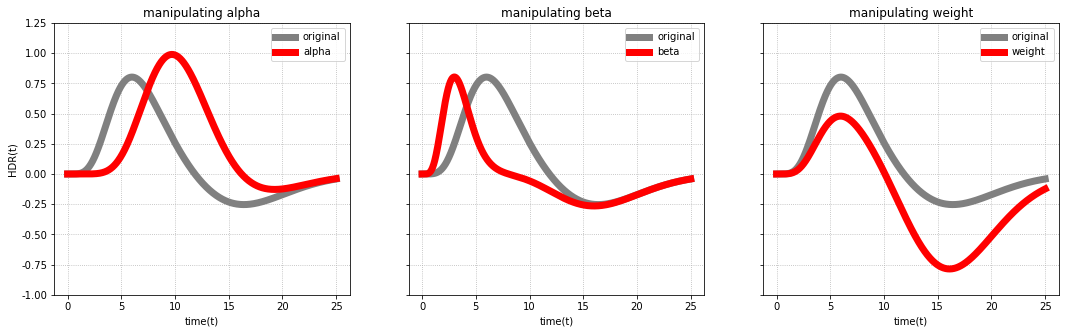

In [81]:
# TODO: Use your functions to recreate the HDR image
t = np.linspace(0, 25, 1000)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

HDR_plt(axs[0], t, HDR_fct(t), HDR_fct(t, alpha1 = 10), 'alpha', 'HDR(t)', yticks)
HDR_plt(axs[1], t, HDR_fct(t), HDR_fct(t, beta1 = 2), 'beta')
HDR_plt(axs[2], t, HDR_fct(t), HDR_fct(t, w = 0.5), 'weight')